## Machine Learning Model for Predicting a Ship's Crew Size
#### This is for my own practice. Original repository is @ the link below. 
        https://github.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size
#### The main purpose of this project is to develop 
        - Data processing & variable selection pipeline
        - Build a basic regression model
        - Hyper-parameters Tuning
        - Techniques for dimensioality reduction



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Users\\hashamkhan\\Documents\\Projects\\ML_Model")

C:\Users\hashamkhan\AppData\Local\Continuum\anaconda3.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hashamkhan\AppData\Local\Continuum\anaconda3.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### Sample Data and Shape

In [6]:
df=pd.read_csv('cruise_ship_info.csv')
print(df.head())
print(df.shape)


     Ship_name Cruise_line  Age  Tonnage  passengers  length  cabins  \
0      Journey     Azamara    6   30.277        6.94    5.94    3.55   
1        Quest     Azamara    6   30.277        6.94    5.94    3.55   
2  Celebration    Carnival   26   47.262       14.86    7.22    7.43   
3     Conquest    Carnival   11  110.000       29.74    9.53   14.88   
4      Destiny    Carnival   17  101.353       26.42    8.92   13.21   

   passenger_density   crew  
0              42.64   3.55  
1              42.64   3.55  
2              31.80   6.70  
3              36.99  19.10  
4              38.36  10.00  
(158, 9)


#### Exploratory Data Analysis
##### Since we are predicting ship's crew size, our taget variable is 'crew'
       - Print Basic Stats
       - Check for missing values
       - Plot correlation plots and determine variables that correlates well with target variable

In [7]:
print(df.describe())

              Age     Tonnage  passengers      length      cabins  \
count  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    15.689873   71.284671   18.457405    8.130633    8.830000   
std      7.615691   37.229540    9.677095    1.793474    4.471417   
min      4.000000    2.329000    0.660000    2.790000    0.330000   
25%     10.000000   46.013000   12.535000    7.100000    6.132500   
50%     14.000000   71.899000   19.500000    8.555000    9.570000   
75%     20.000000   90.772500   24.845000    9.510000   10.885000   
max     48.000000  220.000000   54.000000   11.820000   27.000000   

       passenger_density        crew  
count         158.000000  158.000000  
mean           39.900949    7.794177  
std             8.639217    3.503487  
min            17.700000    0.590000  
25%            34.570000    5.480000  
50%            39.085000    8.150000  
75%            44.185000    9.990000  
max            71.430000   21.000000  


In [8]:
print(pd.isna(df).sum(axis=0))

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64


C:\Users\hashamkhan\AppData\Local\Continuum\anaconda3.1\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


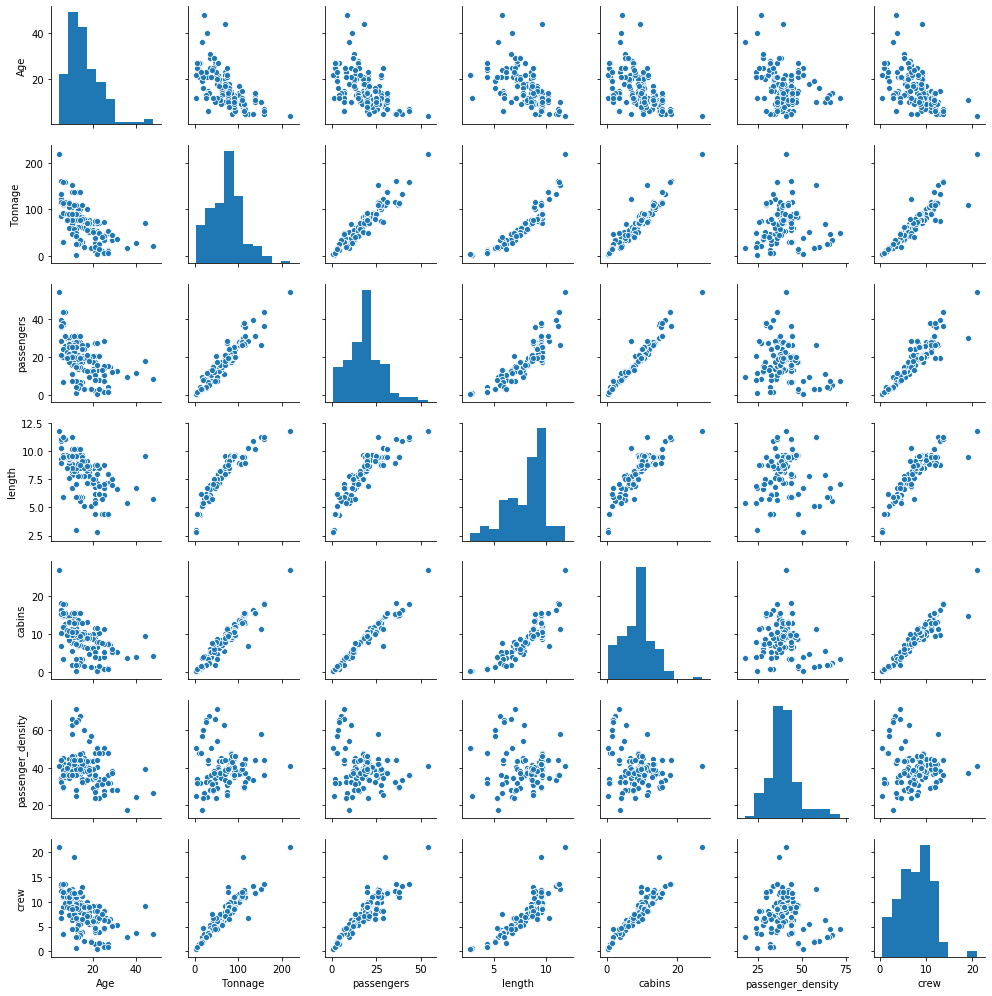

In [9]:
cols = df.columns[2:10]
sns.pairplot(df[cols], size = 2.0)

#### Observations:
    - No missing values found
    - Different variables are at different scales. For example Age lies between 2 and 48 while Tonnage lies between 2 and 220.
    - When building a regression model, some kind of variable normalization will be required to bring all variables on same scale.
    - Of all variables in dataset, Tonnage, passengers, length and cabins correlate well with target variable crew.

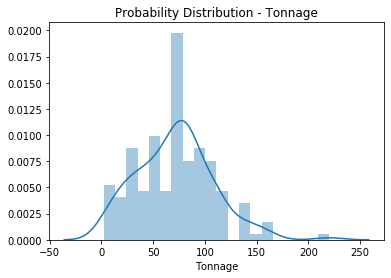

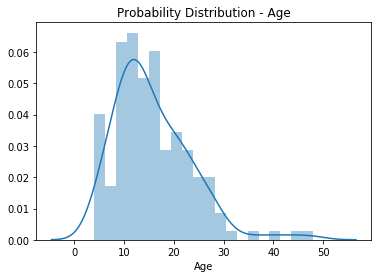

In [10]:
sns.distplot(df['Tonnage'], bins = 20)
plt.title('Probability Distribution - Tonnage')
plt.show()
sns.distplot(df['Age'], bins = 20)
plt.title('Probability Distribution - Age')
plt.show()

#### Variable Selection
##### (a) To select variables for modeling, we start with covariance matrix calculation for ordinal features.

In [40]:
# Standardizing Ordinal Features using StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

array([[-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [ 1.35810515, -0.64731003, -0.37292634, ..., -0.31409539,
        -0.9406764 , -0.31330399],
       ...,
       [ 1.22637979, -1.77666231, -1.74960252, ..., -1.81502263,
        -0.70147068, -1.97978836],
       [ 1.48983051, -1.77666231, -1.74027264, ..., -1.81502263,
        -0.91280777, -1.97978836],
       [ 0.96292907, -1.52350654, -1.59410446, ..., -1.63105247,
         0.92536041, -1.71635785]])

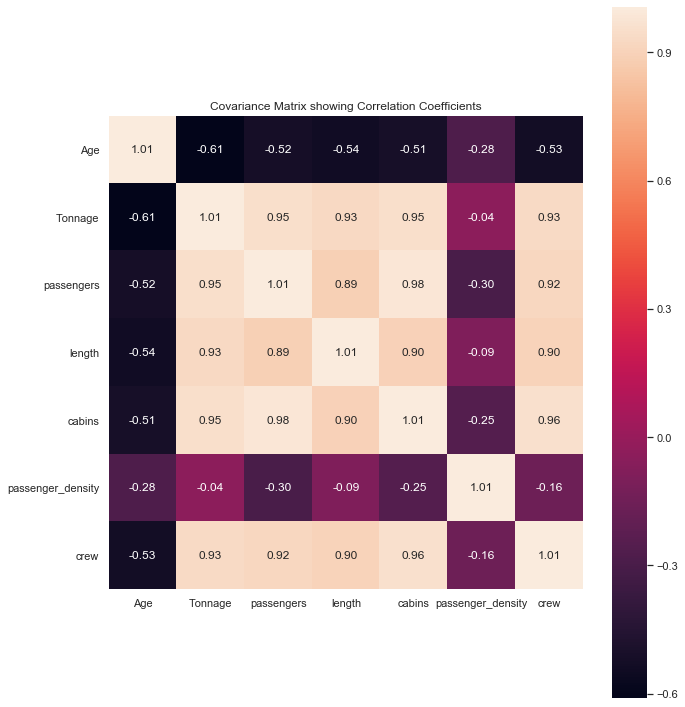

In [13]:
cov_matrix = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(cov_matrix,
                     cbar = True,
                     annot = True,
                     square = True,
                     fmt = '.2f',
                     annot_kws={'size': 12},
                     yticklabels=cols,
                     xticklabels=cols)
plt.title('Covariance Matrix showing Correlation Coefficients')
plt.tight_layout()
plt.show()

#### Variable Selection
##### (b) From covariance matrix, we see target variable crew is highly correlated with predictor variables Tonnage, passengers, length and cabins. This is in line with our observation earlier from pairplots.

In [15]:
features =  ['Tonnage', 'passengers', 'length', 'cabins', 'crew'] #selecting highly correlated variables
df[features].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [16]:
X = df[features].iloc[:,0:4].values # features matrix
y = df[features]['crew'].values     # target variable
print(X.shape)
print(y.shape)

(158, 4)
(158,)


#### One Hot Encoding for Categorical Features
##### Encoding categorical features to dummy variables using One Hot Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=[0,1])
pd.get_dummies(df[['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length', 
                   'cabins', 'passenger_density', 'crew']])

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,23,70.367,20.56,8.55,10.22,34.23,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,19,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6,110.239,37.00,9.51,14.87,29.79,11.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df2=pd.get_dummies(df[['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length', 
                   'cabins', 'passenger_density', 'crew']])
df2.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


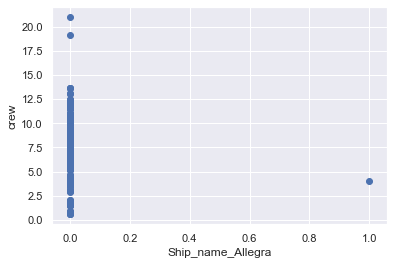

In [20]:
plt.scatter(df2['Ship_name_Allegra'],df2['crew'])
plt.xlabel('Ship_name_Allegra')
plt.ylabel('crew')
plt.show()

#### Regression Model
##### The final regression model is built using ordinal features only. Categorical features are ignored in model development and final predictors used are Tonnage, passengers, length and cabins.

#### Splitting Data in Train and Test

In [25]:
from sklearn.model_selection import train_test_split
X = df[features].iloc[:,0:4].values # features matrix
y = df[features]['crew'].values     # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Building Regression Model
##### We'll build a simple linear regression model using sklearn. 

In [27]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

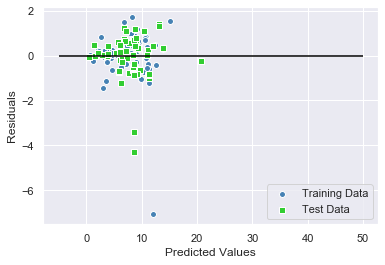

In [34]:
plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label='Test Data')
plt.hlines(y=0,xmin=-5,xmax=50,color='black')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='lower right')
plt.show()


#### Model Evaluation
##### We'll evaluate our regression model using an accuracy measure from sklearn.

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE Train: %.3f, Test: %.3f' %(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R2 Score: %.3f, Test: %.3f' %(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE Train: 0.955, Test: 0.889
R2 Score: 0.920, Test: 0.928


In [45]:
X_test

array([[ 70.367,  20.56 ,   8.55 ,  10.22 ],
       [ 75.166,  19.28 ,   8.28 ,   9.64 ],
       [ 30.277,   6.88 ,   5.93 ,   3.44 ],
       [ 90.09 ,  25.01 ,   9.62 ,  10.5  ],
       [ 53.872,  14.94 ,   7.98 ,   7.47 ],
       [ 74.137,  19.5  ,   9.16 ,   9.75 ],
       [ 48.563,  20.2  ,   6.92 ,   8.   ],
       [ 70.   ,  20.76 ,   8.67 ,   9.02 ],
       [113.   ,  26.74 ,   9.51 ,  13.37 ],
       [ 45.   ,  11.78 ,   7.54 ,   5.3  ],
       [ 70.606,  17.7  ,   8.15 ,   8.75 ],
       [138.   ,  31.14 ,  10.2  ,  15.57 ],
       [ 77.713,  18.9  ,   8.66 ,   9.35 ],
       [ 55.451,  12.66 ,   7.19 ,   6.33 ],
       [ 77.104,  20.02 ,   8.53 ,  10.01 ],
       [116.   ,  26.   ,   9.51 ,  13.   ],
       [158.   ,  43.7  ,  11.25 ,  18.   ],
       [ 91.627,  19.74 ,   9.64 ,   9.87 ],
       [ 10.   ,   2.08 ,   4.4  ,   1.04 ],
       [ 81.769,  18.48 ,   9.59 ,   9.24 ],
       [ 68.   ,  10.8  ,   7.9  ,   5.5  ],
       [ 47.225,  13.66 ,   6.82 ,   6.87 ],
       [ 5